In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
#from tensorflow.keras.utils import to_categorical

In [35]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(xtrain,ytrain),(xtest,ytest)=fashion_mnist
xtrain=xtrain.reshape(-1,28,28,1).astype('float32')/255.0
xtest=xtest.reshape(-1,28,28,1).astype('float32')/255.0

'''
import pandas as pd
import numpy as np

# Load CSV
df = pd.read_csv("fashion-mnist_train.csv")

# Separate features and labels
y_train = df.iloc[:, 0].values
x_train = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_test = df.iloc[:, 0].values
x_test = df.test.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype("float32") / 255.0
'''

In [39]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [41]:
history=model.fit(xtrain,ytrain,epochs=10,validation_split=0.2,verbose=0)

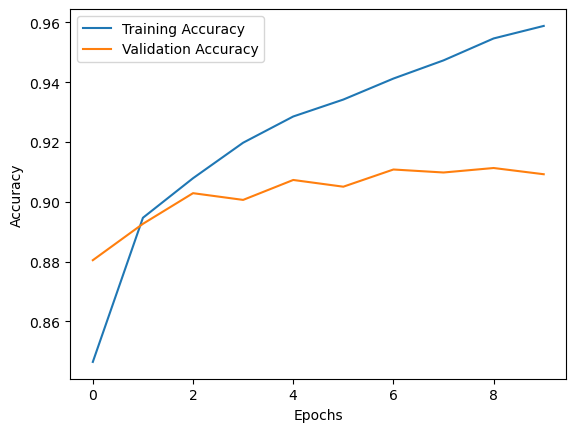

In [43]:
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
testloss,testacc=model.evaluate(xtest,ytest,verbose=0)
print("Test Loss",testloss)
print("Test Accuracy",testacc)


Test Loss 0.292980432510376
Test Accuracy 0.9106000065803528
